# Data exploration / Visualization

In [1]:
# Install all required packages for visualization & analysis
!pip install --upgrade jupyterlab ipympl
!pip install scikit-learn
!pip install numpy
!pip install pandas

     |████████████████████████████████| 8.8 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 121.3 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 434 kB/s s eta 0:00:01
     |████████████████████████████████| 11.8 MB 111.2 MB/s eta 0:00:01
     |████████████████████████████████| 134 kB 125.2 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 120.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 113.8 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 118.6 MB/s eta 0:00:01
     |████████████████████████████████| 960 kB 110.9 MB/s eta 0:00:01
     |████████████████████████████████| 30.8 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 33.8 MB 115.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 117.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 110.5 MB/s eta 0:00:01


In [1]:
import cml.data_v1 as cmldata
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
database_password = os.environ["WORKLOAD_PASSWORD"]
databse_user = os.environ["WORKLOAD_USER"]

In [4]:
CONNECTION_NAME = "afrank-dev"
conn = cmldata.get_connection(CONNECTION_NAME, {"USERNAME": databse_user, "PASSWORD": database_password})

## Sample Usage to get pandas data frame
EXAMPLE_SQL_QUERY = """
SELECT *
FROM default.afrank_test
; """

dataframe = conn.get_pandas_dataframe(EXAMPLE_SQL_QUERY)

In [3]:
dataframe.head()

,x,y,z,device_id,y_label,timestamp
0,0.009,-0.010,0.004,85200922,1,1666083298799
1,0.019,-0.004,-0.009,14927601,1,1666083298779
2,0.017,-0.017,0.010,85200922,1,1666083298816
3,0.006,-0.003,-0.003,85200922,1,1666083298833
4,-0.013,0.015,0.034,69465333,1,1666083298845


In [5]:
dataframe.describe()

,x,y,z,device_id,y_label,timestamp
count,9048.000000,9048.000000,9048.000000,9.048000e+03,9048.000000,9.048000e+03
mean,-0.429847,2.544277,-0.001065,3.980377e+07,1.989390,1.666083e+12
std,9.435799,8.186726,6.687398,3.116330e+07,0.818366,3.635970e+04
min,-67.332001,-35.682999,-74.907997,9.909101e+06,1.000000,1.666083e+12
25%,-0.531000,-0.035000,-0.632000,1.313381e+07,1.000000,1.666083e+12
50%,0.000000,0.017000,-0.010000,1.492760e+07,2.000000,1.666083e+12
75%,0.500000,1.218500,0.350000,6.946533e+07,3.000000,1.666083e+12
max,51.595001,73.031998,67.947998,9.302515e+07,3.000000,1.666083e+12


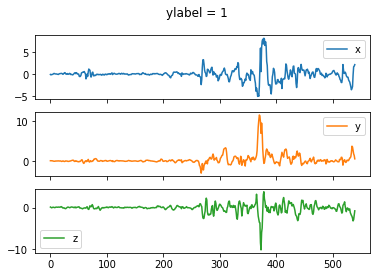

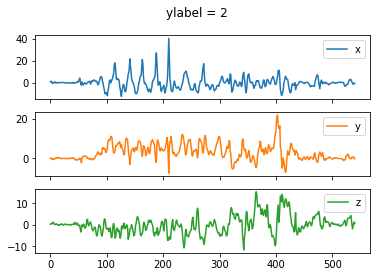

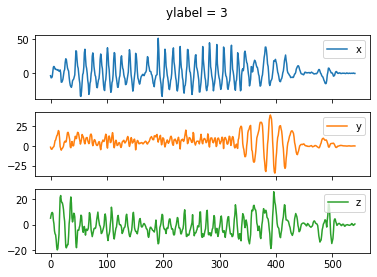

In [6]:
for label in [1,2,3]:
    df = dataframe.query('y_label == @label & device_id == 9909101')[['x','y','z','timestamp']]
    df.sort_values('timestamp', inplace=True)
    df.reset_index(inplace=True)
    df[['x','y','z']].plot.line(subplots=True, title = f'ylabel = {label}')

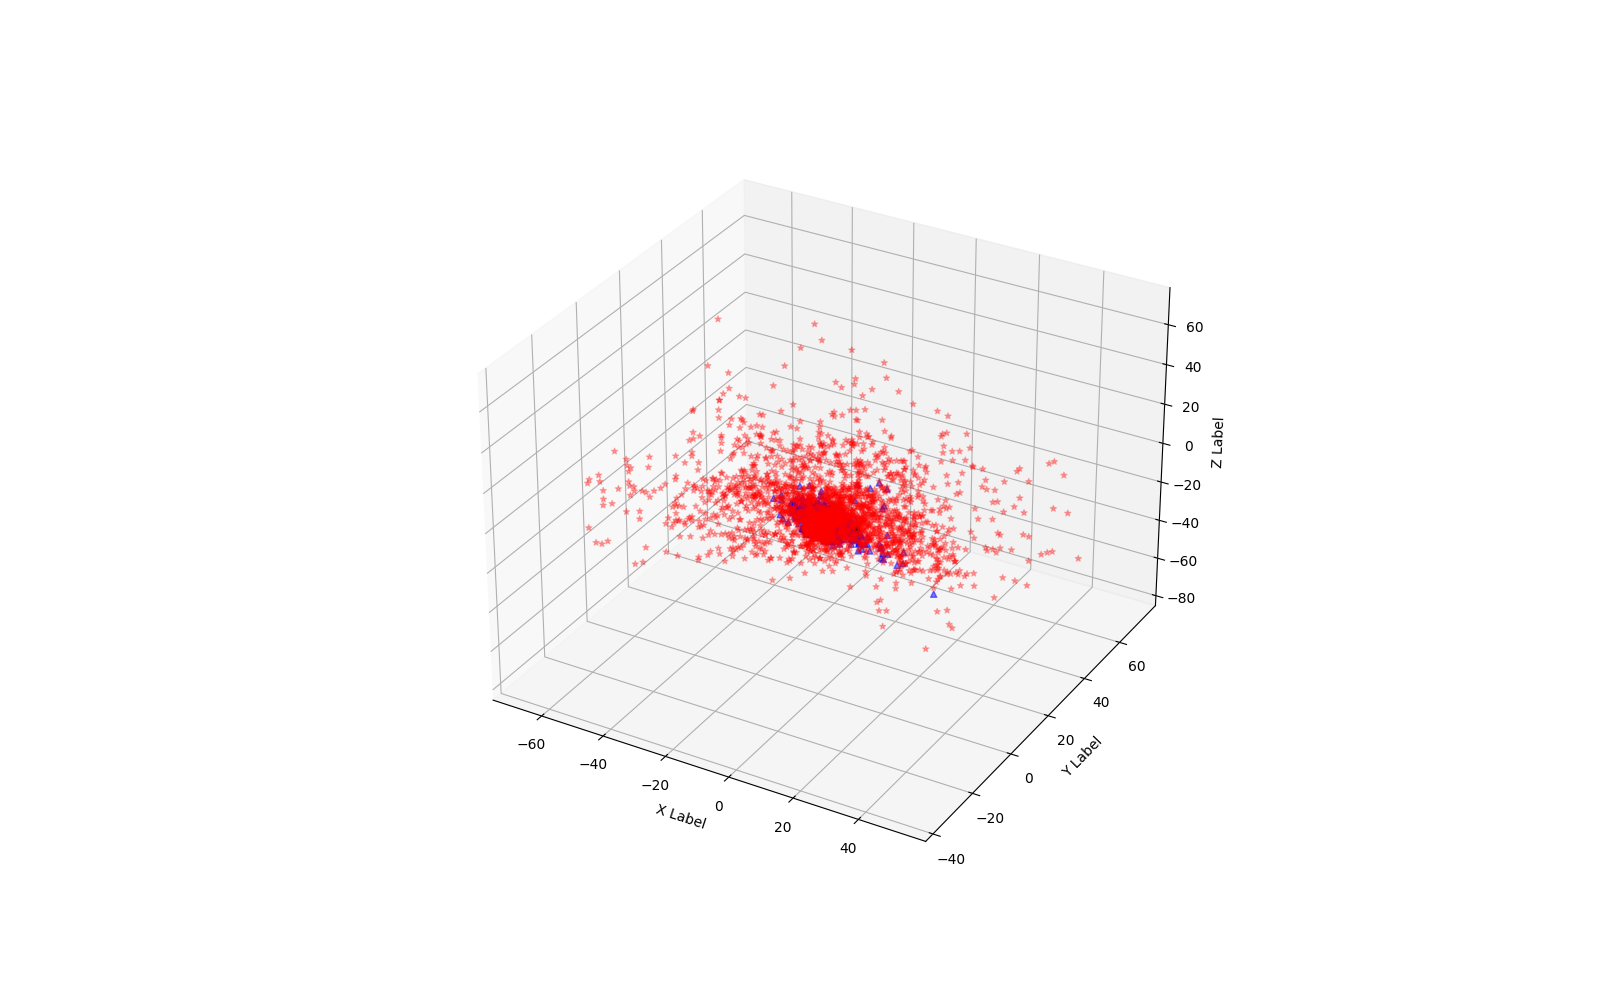

In [7]:
%matplotlib widget

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for marker, color, label, alpha in [('o', 'black', 1, 1), ('^', 'blue', 2, 0.5), ('*', 'red', 3, 0.3)]:
    xs = dataframe[dataframe['y_label'] == label]['x']
    ys = dataframe[dataframe['y_label'] == label]['y']
    zs = dataframe[dataframe['y_label'] == label]['z']
    ax.scatter(xs, ys, zs, marker=marker, color=color, alpha=alpha)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()